## 도표의 모양과 배치 설정하고 관리하기

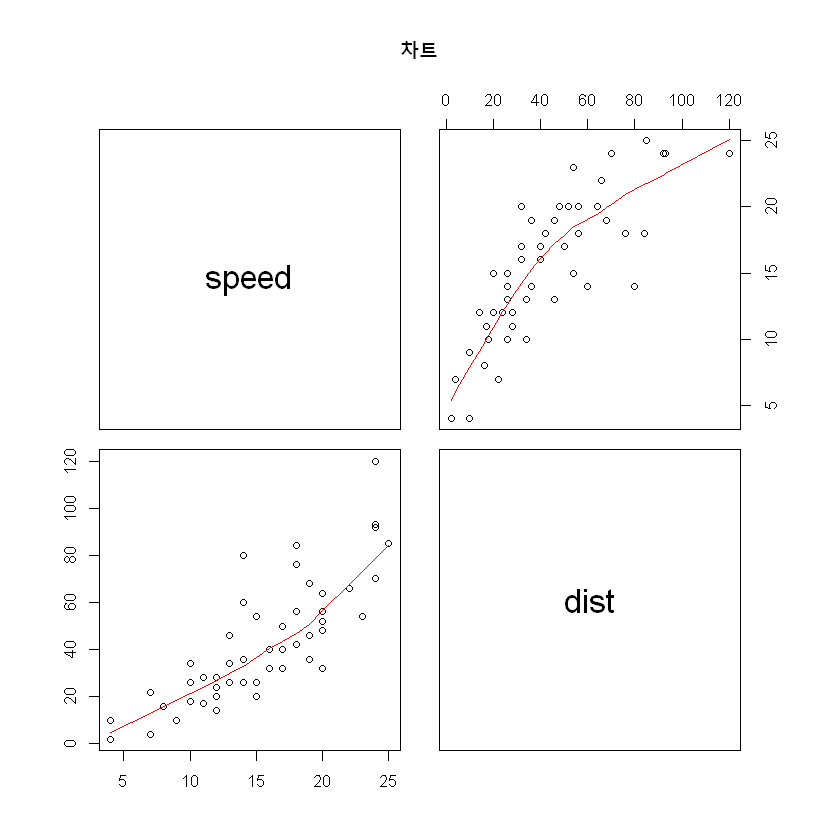

In [1]:
op <- par(mfrow = c(1, 1), pty = "s")
pairs(cars, panel = panel.smooth, main = "차트")
par(op)

In [2]:
vX <- 1:12
vY <- rnorm(12)

In [3]:
par(oma = c(1, 1, 1, 1))

In [4]:
par(mar = c(7, 5, 3, 1))

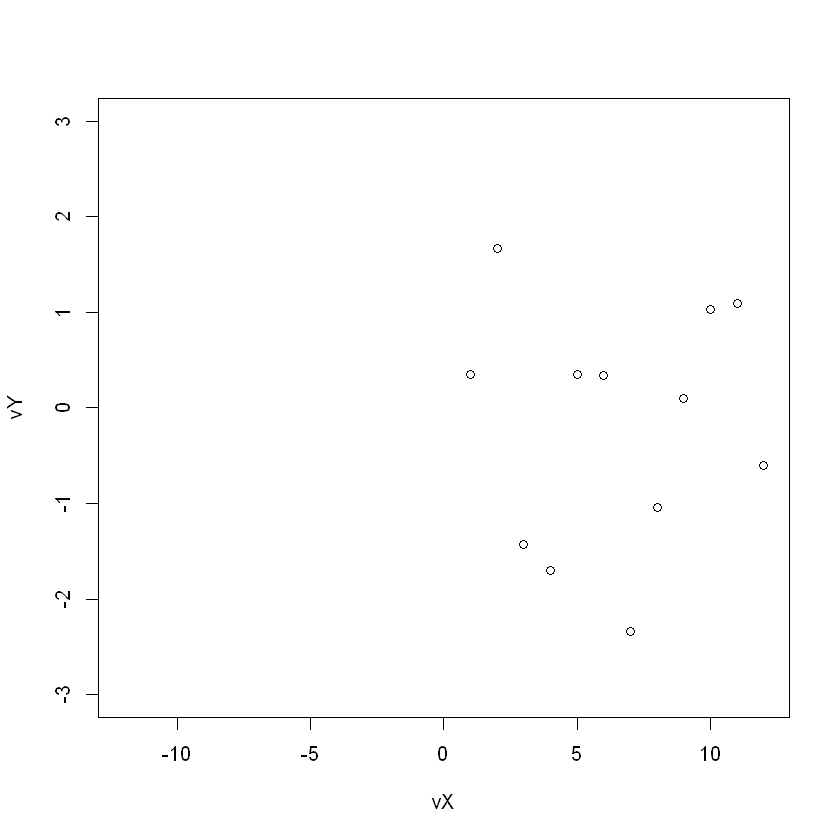

In [5]:
plot(vX, vY, xlim = c(-12, 12), ylim = c(-3, 3))

In [6]:
showLty <- function(ltys, xoff = 0, ...) {
  stopifnot((n <- length(ltys)) >= 1)
  op <- par(mar = rep(.5, 4))
  on.exit(par(op))
  
  plot(0:1, 0:1, type = "n", axes = FALSE, ann = FALSE)
  y <- (n:1) / (n + 1)
  clty <- as.character(ltys)
  mytext <- function(x, y, txt)
    text(x, y, txt, adj = c(0, -3), cex = 0.8, ...)
  
  abline(h = y, lty = ltys, ...)
  mytext(xoff, y, clty)
  
  y <- y - 1 / (3 * (n + 1))
  abline(h = y, lty = ltys, lwd = 2, ...)
  mytext(1 / 8 + xoff, y, paste(clty, " lwd = 2"))
}

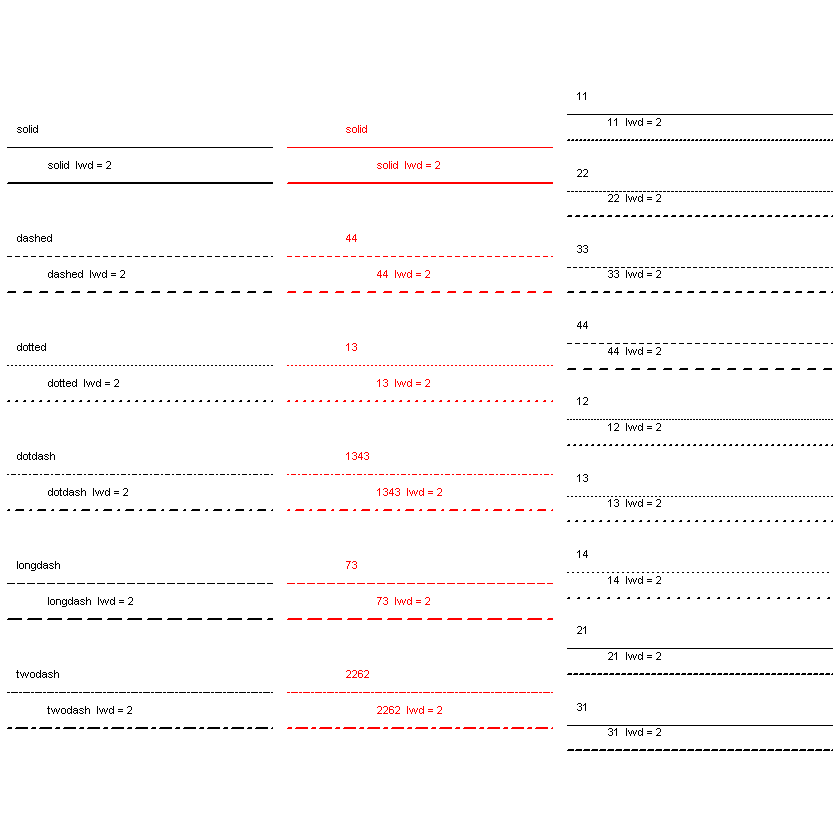

In [7]:
par(mfrow = c(1, 3))
showLty(c("solid", "dashed", "dotted", "dotdash", "longdash", "twodash"))
showLty(c("solid", "44", "13", "1343", "73", "2262"), xoff = .2, col = 2)
showLty(c("11", "22", "33", "44", "12", "13", "14", "21", "31"))

In [8]:
pLayout = layout(
    rbind(
        c(1, 1),
        c(2, 3)
    )
)

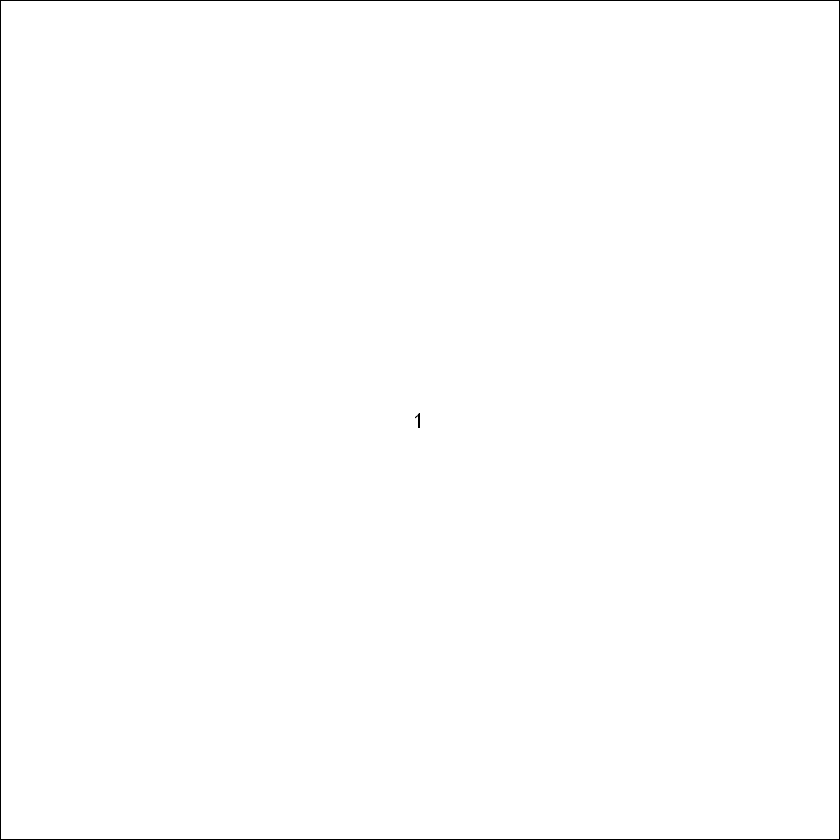

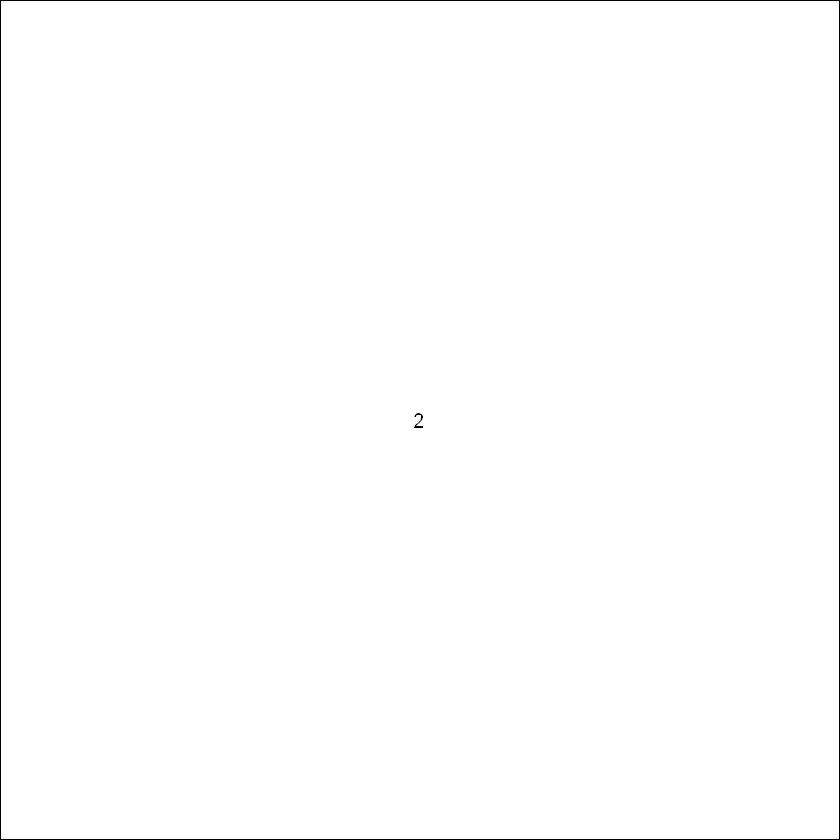

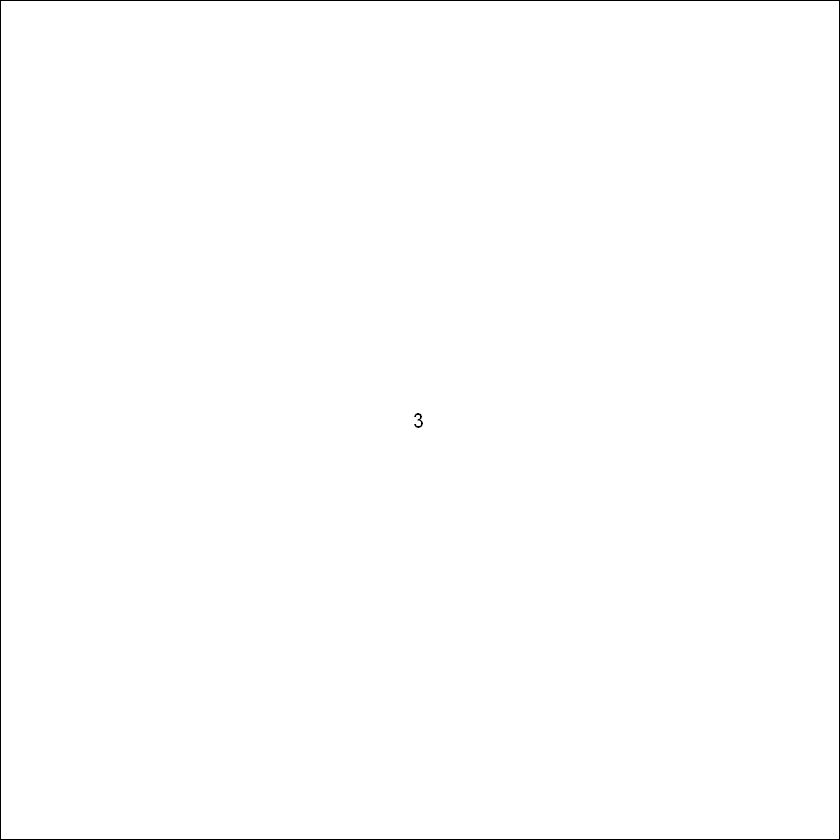

In [9]:
layout.show(pLayout)

In [10]:
layout(1)

In [11]:
# 6 도표 배열서 한칸의 배치 건너 뛰고 그림 그리기

In [12]:
par(oma = c(1, 1, 1, 1))
layout(rbind(c(1, 2), c(3, 4)))

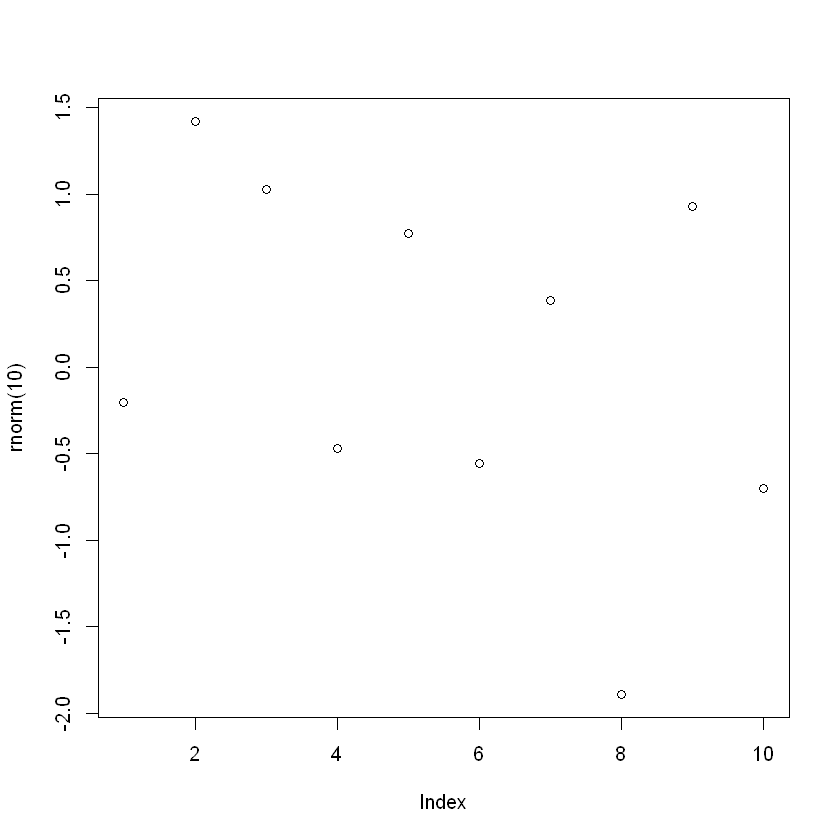

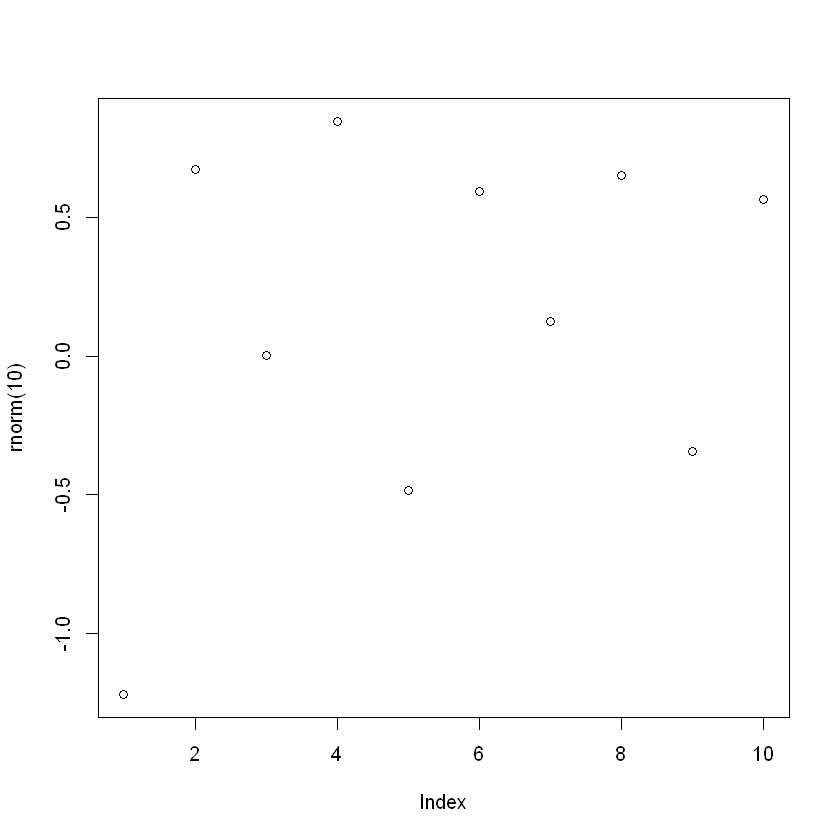

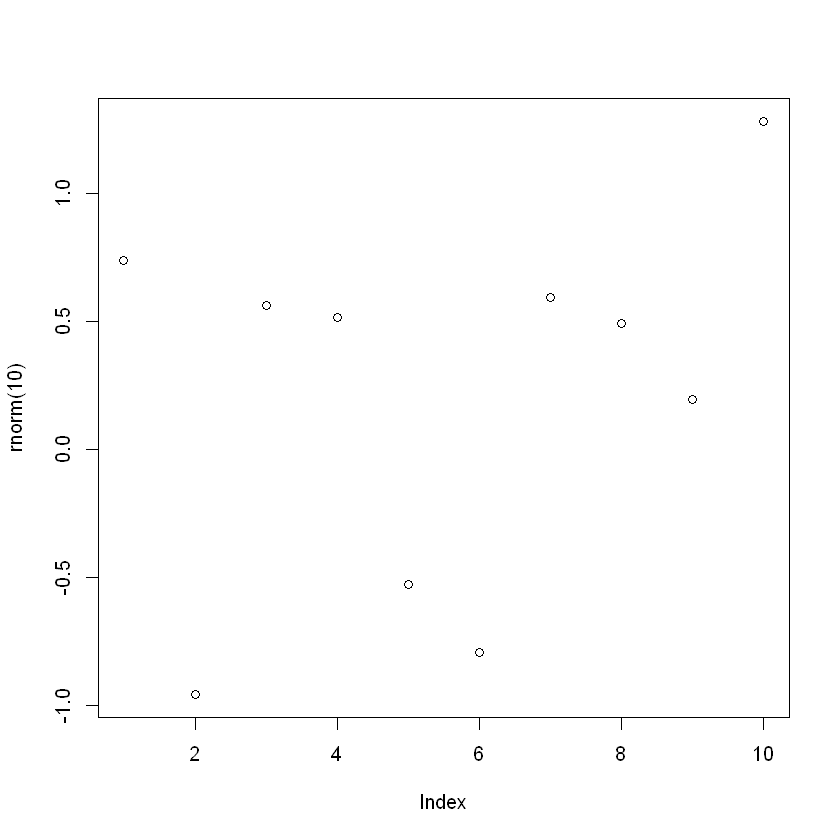

In [14]:
plot(rnorm(10))
plot.new()
plot(rnorm(10))
plot(rnorm(10))

### 도표의 축 설정 및 관리하기
### 축 수동으로 그리기

In [15]:
par(mfrow = c(1, 2))
x <- rnorm(rnorm(10))
y <- rnorm(rnorm(10))

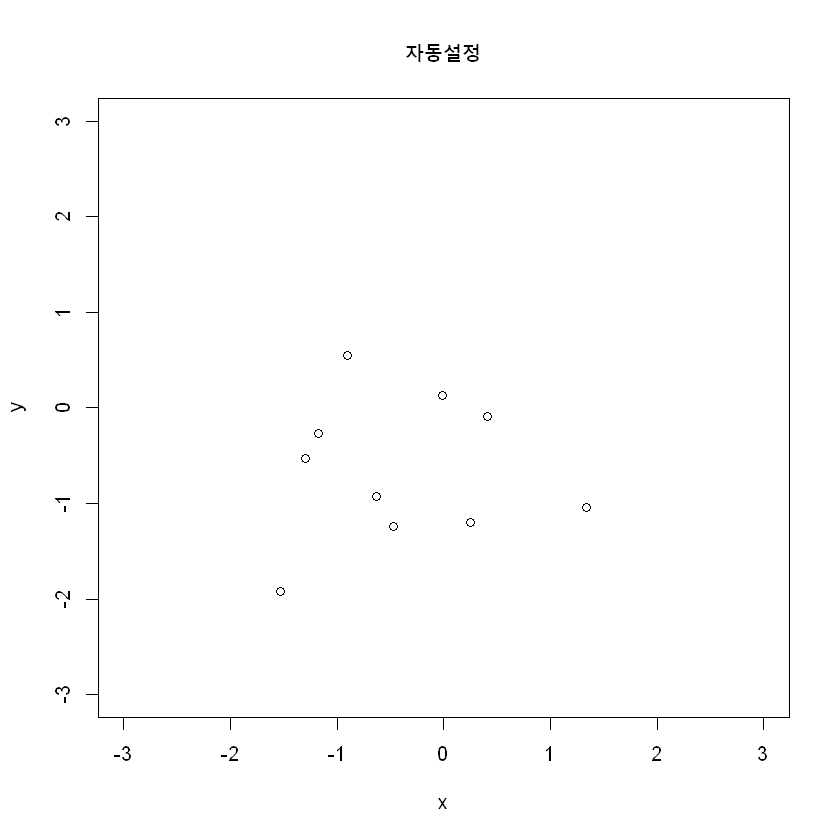

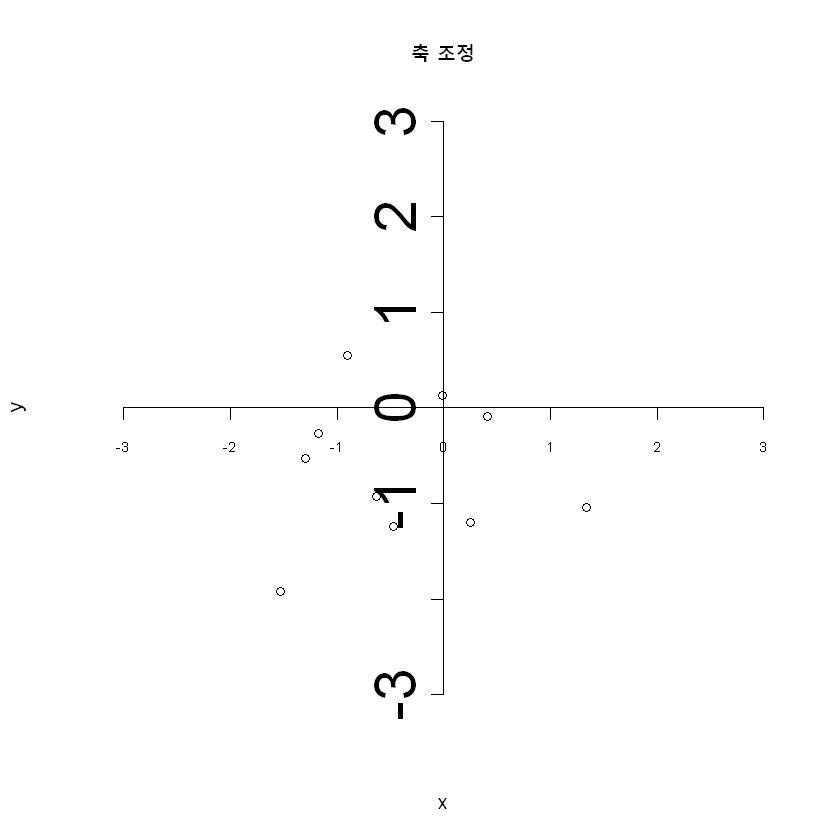

In [18]:
plot(x, y, xlim = c(-3, 3), ylim = c(-3, 3), main = "자동설정")
plot(x, y, xlim = c(-3, 3), ylim = c(-3, 3), axes = F, main = "축 조정")
axis(side = 1, pos = 0, cex.axis = 0.7)
axis(side = 2, pos = 0, cex.axis = 3)

In [19]:
# 레이블명과 지점 설정하기

In [20]:
x <- 1:12
y <- rnorm(12)

In [26]:
xLabelPlaces <- 1:12
xLabelNames <- paste(1:12, "M", sep = " ")

yLabelPlaces <- seq(-2, 2, l = 5)

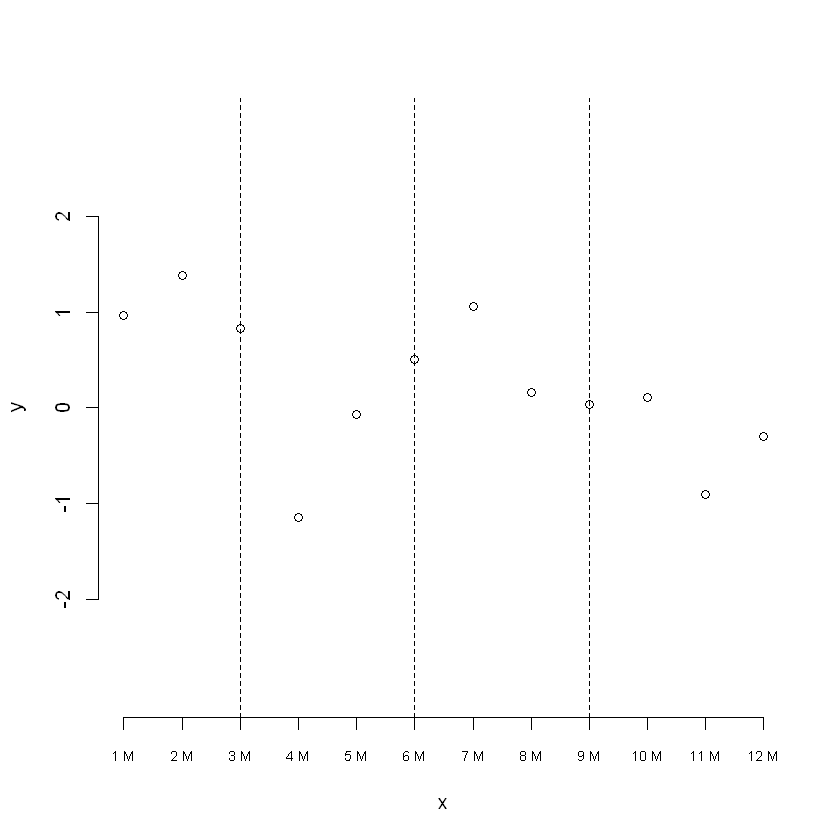

In [27]:
plot(x, y, ylim = c(-3, 3), axes = F)
axis(side = 1, at = xLabelPlaces, labels = xLabelNames, cex.axis = 0.7)
# 내부 점선 추가
axis(side = 1, at = c(3, 6, 9), labels = NA, tck = 1, lty = 2)

axis(side = 2, at=yLabelPlaces)

### 연도별 4분기로 축 조정한 산점도 그리기

In [28]:
# 연도
year <- rep(2008:2010, each = 4)
# 분기
quater <- rep(1:4, 3)

In [29]:
# 데이터
cpi <- c(162.2, 164.6, 166.5, 166, 166.2, 167, 168.6, 169.5, 171, 172.1, 173.3, 174)

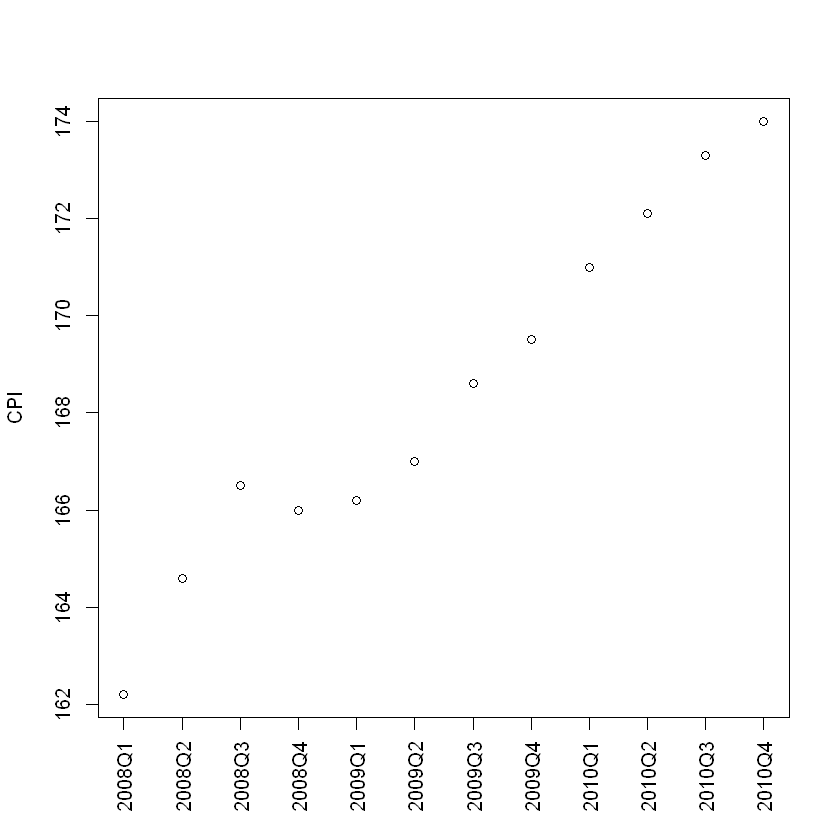

In [30]:
plot(cpi, xaxt = "n", ylab = "CPI", xlab = "")
axis(1, labels = paste(year, quater, sep = "Q"), at = 1:12, las = 3)

In [32]:
# PDF 저장

pdf(file = "plot.pdf")
plot(cpi, xaxt = "n", ylab = "CPI", xlab = "")
axis(1, labels = paste(year, quater, sep = "Q"), at = 1:12, las = 3)
graphics.off()

## 통찰 과정
P. 625

**1단계 - 탐색**

- 분석할 대상에 대해 큰 틀에서의 목표와 살펴볼 수 있는 대상들만 주어지는 경우가 많다.
- 탐색
    - 자료를 확인
    - 자료가 어떤 의미를 가지는지 살펴보기
    - 자료들간에 어떤 관계가 있는지
- **모든 가능성을 열어두고 탐색** 하는 것이 중요

## 위도, 경도로 지도 그리기

In [33]:
library(ggmap)
library(ggplot2)

Warning message:
"package 'ggmap' was built under R version 3.4.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.2"

In [34]:
lat <- c(44.49, 44.5)
lon <- c(11.33, 11.36)

In [35]:
map <- get_map(location = c(lon = mean(lon), lat = mean(lat)), zoom = 14,
       maptype = "roadmap", source = "google")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=44.495,11.345&zoom=14&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false


In [36]:
foo <- ggmap(map) + scale_x_continuous(limits = c(11.33, 11.36), expand = c(0, 0)) + scale_y_continuous(limits = c(44.49, 44.5), expand = c(0, 0))

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


Warning message:
"Removed 1 rows containing missing values (geom_rect)."

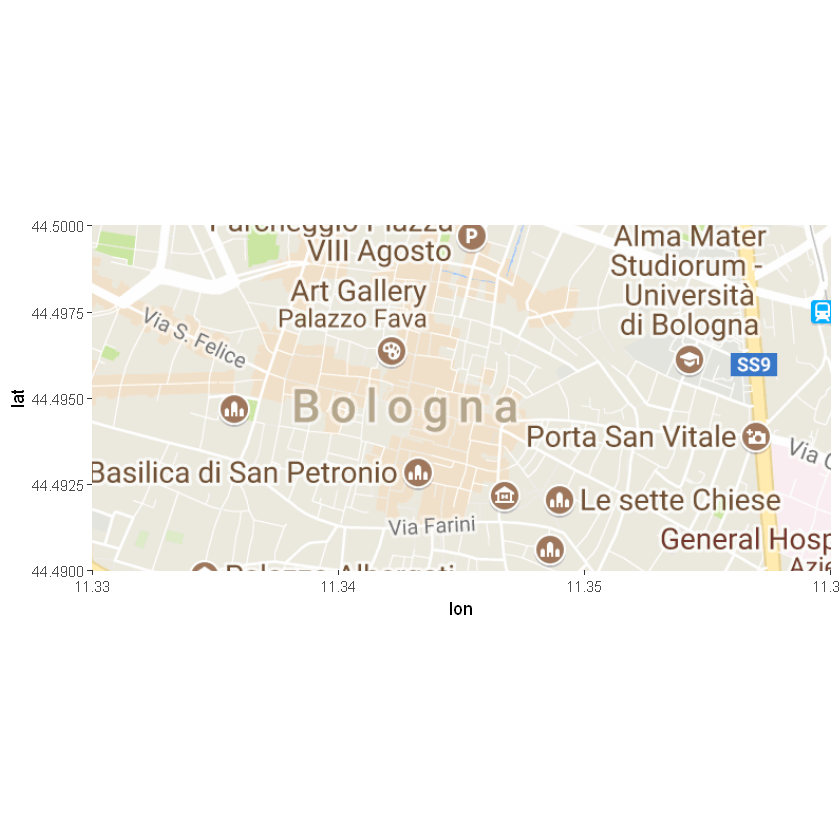

In [37]:
foo

In [38]:
library(rgdal)
library(ggplot2)
mapDir <- 'datas/KOR_GIS_data'

Warning message:
"package 'rgdal' was built under R version 3.4.2"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.4.2"rgdal: version: 1.2-13, (SVN revision 686)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.0, released 2017/04/28
 Path to GDAL shared files: C:/Users/user/Documents/R/win-library/3.4/rgdal/gdal
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/user/Documents/R/win-library/3.4/rgdal/proj
 Linking to sp version: 1.2-5 


In [39]:
list.files(mapDir)
layer_KOR_adm1 <- "KOR_adm1"
layer_KOR_adm0 <- "KOR_adm0"
layer_KOR_adm2 <- "KOR_adm2"

[1] "KOR_adm.zip"     "KOR_adm_shp.zip" "KOR_adm0.csv"    "KOR_adm0.dbf"   
 [5] "KOR_adm0.prj"    "KOR_adm0.rds"    "KOR_adm0.shp"    "KOR_adm0.shx"   
 [9] "KOR_adm1.csv"    "KOR_adm1.dbf"    "KOR_adm1.prj"    "KOR_adm1.rds"   
[13] "KOR_adm1.shp"    "KOR_adm1.shx"    "KOR_adm2.csv"    "KOR_adm2.dbf"   
[17] "KOR_adm2.prj"    "KOR_adm2.rds"    "KOR_adm2.shp"    "KOR_adm2.shx"   
[21] "read_me.pdf"

In [40]:
KOR_adm1_projected <- readOGR(dsn = mapDir, layer = layer_KOR_adm1)
KOR_adm0_projected <- readOGR(dsn = mapDir, layer = layer_KOR_adm0)
KOR_adm2_projected <- readOGR(dsn = mapDir, layer = layer_KOR_adm2)

OGR data source with driver: ESRI Shapefile 
Source: "datas/KOR_GIS_data", layer: "KOR_adm1"
with 16 features
It has 9 fields
OGR data source with driver: ESRI Shapefile 
Source: "datas/KOR_GIS_data", layer: "KOR_adm0"
with 1 features
It has 24 fields
OGR data source with driver: ESRI Shapefile 
Source: "datas/KOR_GIS_data", layer: "KOR_adm2"
with 229 features
It has 11 fields


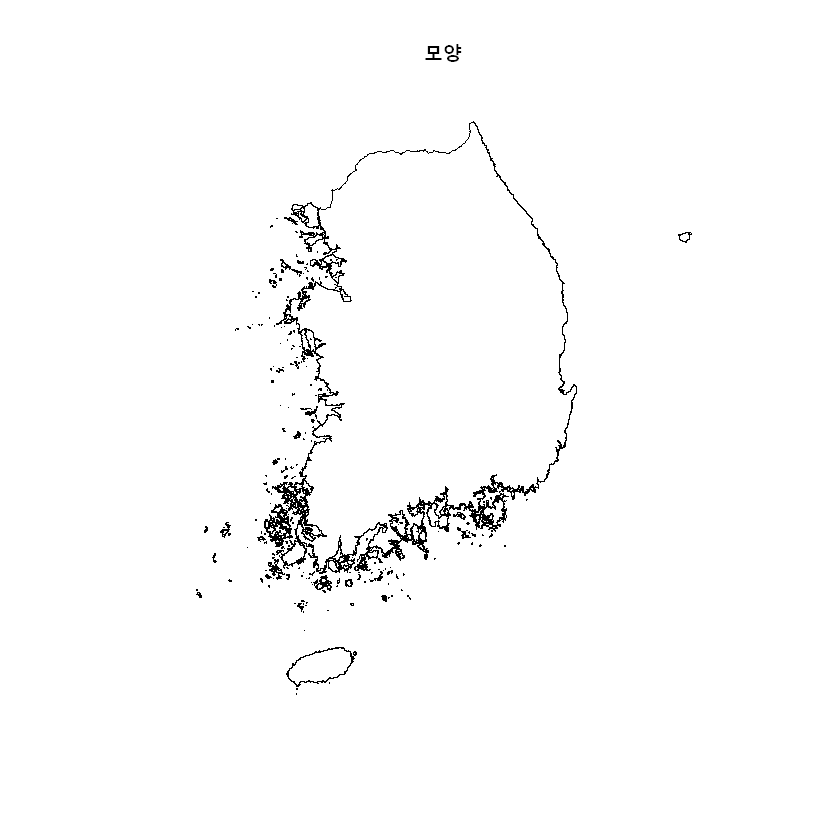

In [45]:
plot(KOR_adm0_projected, main = "모양")

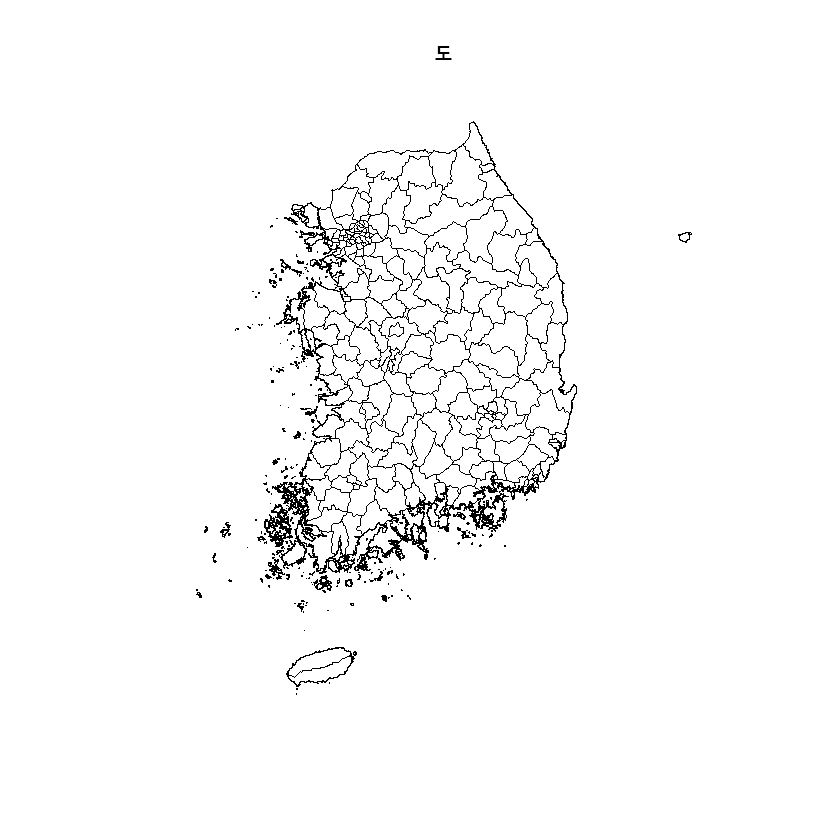

In [46]:
plot(KOR_adm2_projected, main = "도")

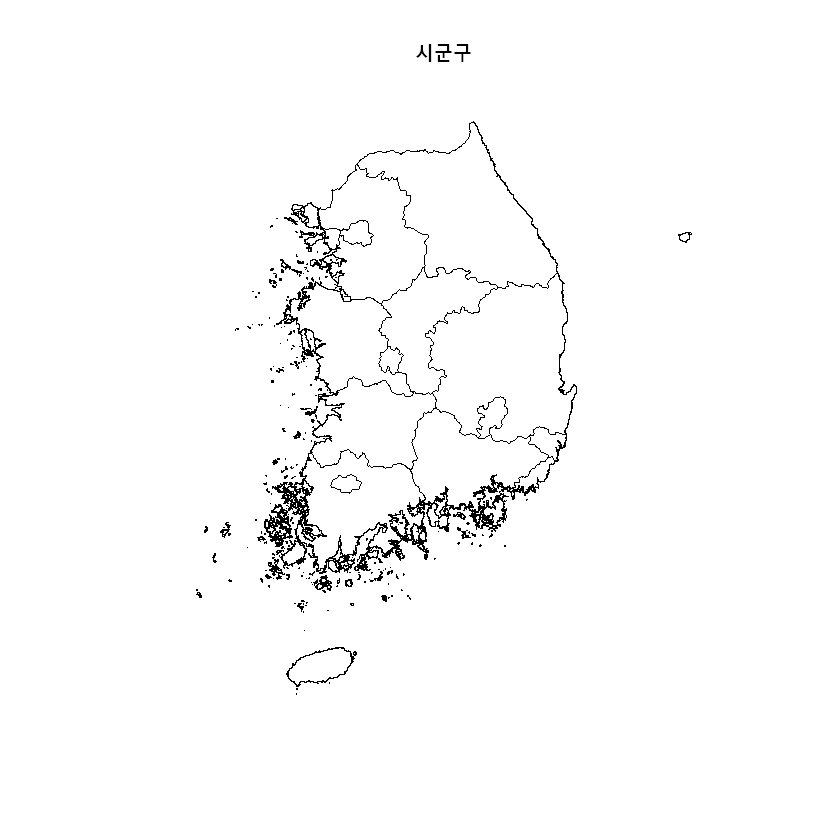

In [42]:
plot(KOR_adm1_projected, main = "시군구")